In [10]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve

Question 1:

In [11]:
def update_first(x_dot,y_dot,teta_dot,prev_x,prev_y,prev_teta,dt):
    x = prev_x + x_dot*(math.pi/180)*dt
    y = prev_y + y_dot*(math.pi/180)*dt
    teta = prev_teta + teta_dot*dt
    return x,y,teta

In [12]:
def first_function(first,second,radius,shaft,orientation):
  # مختصات ربات
  x_r = ((radius*first)/2)+((radius*second)/2)
  y_r = 0
  teta_r = ((radius*first)/(2*shaft))-((radius*second)/(2*shaft))
  # مختصات مرجع
  one = np.array([[math.cos(-1*orientation),math.sin(-1*orientation),0],
            [-1*math.sin(-1*orientation),math.cos(-1*orientation),0],
            [0,0,1]])
  two = np.array([x_r,y_r,teta_r])
  oneTwo = one.dot(two)
  return x_r,y_r,teta_r,oneTwo

In [13]:
def total_first(first,second,radius,shaft,orientation): 
  dt = 0.1

  # موقعیت ربات در زمان‌های مختلف
  xs = [] 
  ys = []
  tetas = []

  # موقعیت اولیه ربات به صورت فرضی انتخاب شده است
  xs.append(1)
  ys.append(1)
  tetas.append(orientation*(180/math.pi))

  # موقعیت فعلی ربات 
  x = xs[0]
  y = ys[0]
  teta = tetas[0]

  # سرعت خطی و زاویه ای ربات در دستگاه مرجع در زمان های مختلف 
  x_dots = []
  y_dots = []
  teta_dots = []

  # سرعت خطی و زاویه ای ربات در دستگاه ربات در زمان های مختلف
  x_r_dots = []
  y_r_dots = []
  teta_r_dots = []

  # محاسبه سرعت‌ها در موقعیت اولیه و ثبت مقدار آن در آرایه های مربوطه
  x_r,y_r,teta_r,oneTwo = first_function(first,second,radius,shaft,orientation)
  x_dot,y_dot,teta_dot = oneTwo[0],oneTwo[1],oneTwo[2]

  x_dots.append(x_dot)
  y_dots.append(y_dot)
  teta_dots.append(teta_dot)

  x_r_dots.append(x_r)
  y_r_dots.append(y_r)
  teta_r_dots.append(teta_r)

  for i in range (1,1000):
    x,y,teta = update_first(x_dot,y_dot,teta_dot,xs[i-1],ys[i-1],tetas[i-1],dt)
    xs.append(x)
    ys.append(y)
    tetas.append(teta)
    
    x_r,y_r,teta_r,oneTwo = first_function(first,second,radius,shaft,teta*(math.pi/180))
    x_dot,y_dot,teta_dot = oneTwo[0],oneTwo[1],oneTwo[2]
    x_dots.append(x_dot)
    y_dots.append(y_dot)
    teta_dots.append(teta_dot)

    x_r_dots.append(x_r)
    y_r_dots.append(y_r)
    teta_r_dots.append(teta_r)

  print(oneTwo)

  ones = np.arange(0,1000).tolist()

  fig, axs = plt.subplots(3,4, constrained_layout=True)

  # تغییرات مکان ربات
  axs[0,0].plot(xs, ys)
  axs[0,0].set_xlabel('x')
  axs[0,0].set_ylabel('y')

  # تغییرات مکان ربات در محور ایکس در طول زمان
  axs[0,1].plot(ones, xs)
  axs[0,1].set_xlabel('time')
  axs[0,1].set_ylabel('x')

  # تغییرات مکان ربات در محور ایگرگ در طول زمان
  axs[0,2].plot(ones, ys)
  axs[0,2].set_xlabel('time')
  axs[0,2].set_ylabel('y')

  # تغییرات زاویه ربات در طول زمان
  axs[0,3].plot(ones, tetas)
  axs[0,3].set_xlabel('time')
  axs[0,3].set_ylabel('teta')

  # تغییرات سرعت زاویه ای ربات در دستگاه مرجع در طول زمان
  axs[1,0].plot(ones, teta_dots)
  axs[1,0].set_xlabel('time')
  axs[1,0].set_ylabel('teta_dot')

  # تغییرات سرعت در محور ایکس ربات در دستگاه مرجع در طول زمان
  axs[1,1].plot(ones, x_dots)
  axs[1,1].set_xlabel('time')
  axs[1,1].set_ylabel('x_dot')

  # تغییرات سرعت در محور ایگرگ ربات در دستگاه مرجع در طول زمان
  axs[1,2].plot(ones, y_dots)
  axs[1,2].set_xlabel('time')
  axs[1,2].set_ylabel('y_dot')

  # تغییرات سرعت زاویه ای ربات در دستگاه ربات در طول زمان
  axs[1,3].plot(ones, teta_r_dots)
  axs[1,3].set_xlabel('time')
  axs[1,3].set_ylabel('teta_r_dot')

  # تغییرات سرعت در محور ایکس ربات در دستگاه ربات در طول زمان
  axs[2,0].plot(ones, x_r_dots)
  axs[2,0].set_xlabel('time')
  axs[2,0].set_ylabel('x_r_dot')

  # تغییرات سرعت در محور ایگرگ ربات در دستگاه ربات در طول زمان
  axs[2,1].plot(ones, y_r_dots)
  axs[2,1].set_xlabel('time')
  axs[2,1].set_ylabel('y_r_dot')

  plt.show()


Tests for 1:


[10.82531755  6.25        0.        ]


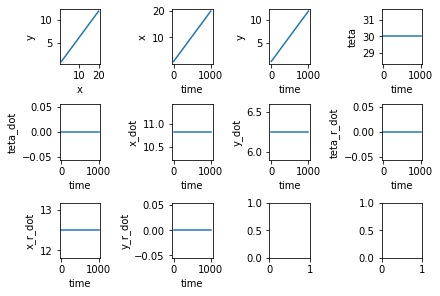

In [14]:
total_first(5,5,2.5,10,(math.pi/6))

[ 0.    0.   -1.25]


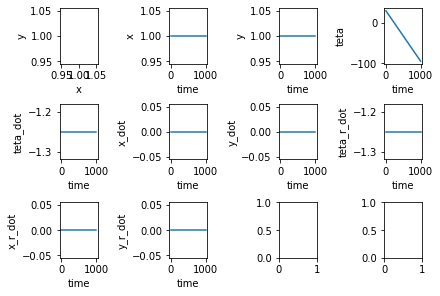

In [15]:
total_first(-5,5,2.5,10,(math.pi/6))

[ 25.79418936 -56.92898906   6.25      ]


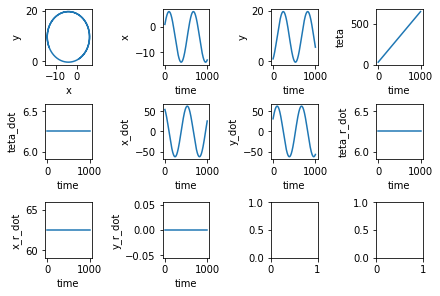

In [16]:
total_first(50,0,2.5,10,(math.pi/6))

[  77.38256809 -170.78696717    6.25      ]


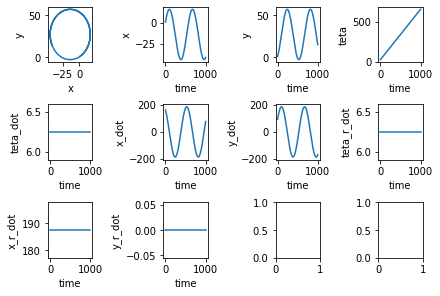

In [17]:
total_first(100,50,2.5,10,(math.pi/6))

[-1.2443276  -2.16832858 -1.5       ]


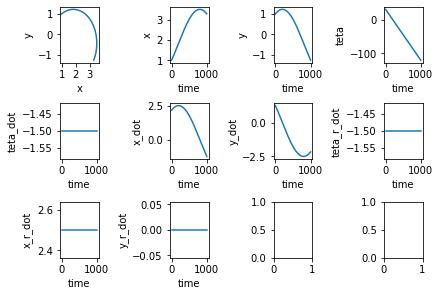

In [18]:
# the example of slides
total_first(-5,7,2.5,10,(math.pi/6))

Question 2:

In [19]:
def draw_second(phi1,phi2):
  phi1s = []
  phi2s = []
  times = []
  for i in range(0,500):
    phi1s.append(phi1)
    phi2s.append(phi2)
    times.append(i)
    
  fig, axs = plt.subplots(1,2, constrained_layout=True)

  axs[0].plot(times, phi1s)
  axs[0].set_xlabel('time')
  axs[0].set_ylabel('phi1')

  axs[1].plot(times, phi2s)
  axs[1].set_xlabel('time')
  axs[1].set_ylabel('phi2')

  plt.show()

In [20]:
def second_function(x_dot,y_dot,teta_dot,radius,shaft,orientation,show):

  if show==1:
    one = [[math.cos(orientation),math.sin(orientation),0],[(-1)*math.sin(orientation),math.cos(orientation),0],[0,0,1]]
    two = [[x_dot],[y_dot],[teta_dot]]
    oneTwo = np.dot(one,two)

    x_r_dot = oneTwo[0][0]
    y_r_dot = oneTwo[1][0]
    teta_r_dot = oneTwo[2][0]*(math.pi/180)

  else: # this part is used in part 3 where the inputs are actually x_r_dot,y_r_dot and teta_r_dot
    x_r_dot = x_dot
    y_r_dot = y_dot
    teta_r_dot = teta_dot

  phi_dot_1,phi_dot_2 = symbols("phi_dot_1,phi_dot_2")
  eq1 = Eq((((radius/2)*phi_dot_1)+((radius/2)*phi_dot_2)),x_r_dot)
  eq2 = Eq((((radius/(2*shaft))*phi_dot_1)-((radius/(2*shaft))*phi_dot_2)),teta_r_dot)
  result = solve((eq1,eq2),(phi_dot_1,phi_dot_2))
  phi1 = result[phi_dot_1]
  phi2 = result[phi_dot_2]
  
  if show == 1: 
    print("phi1: ",phi1,"phi2: ",phi2)
    draw_second(phi1,phi2)

  return phi1,phi2

Tsets for 2:

phi1:  0.635498595029009 phi2:  0.495872254869463


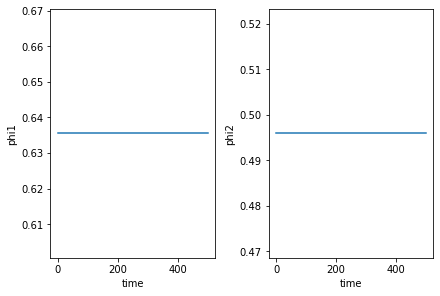

(0.635498595029009, 0.495872254869463)

In [21]:
second_function(1,1,1,2.5,10,(math.pi/4),1)

phi1:  0.0698131700797732 phi2:  -0.0698131700797732


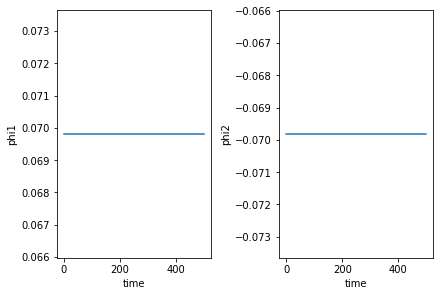

(0.0698131700797732, -0.0698131700797732)

In [22]:
second_function(0,0,1,2.5,10,(math.pi/4),1)

 Question 3:

In [23]:
def get_alpha_beta_ro(first_x,final_x,first_y,final_y,first_teta):
  ro = math.sqrt(math.pow(final_x-first_x,2) + math.pow(final_y-first_y,2))
  alpha = -1 * first_teta + np.arctan2((float)(final_y-first_y),(float)(final_x-first_x))*(180/math.pi)
  beta = -1 * first_teta - alpha
  return alpha,beta,ro

In [24]:
def third_function(first_x,final_x,first_y,final_y,first_teta,radius,shaft):

  dt = 0.1

  k_ro = 3
  k_beta = -3
  k_alpha = 10

  alpha,beta,ro = get_alpha_beta_ro(first_x,final_x,first_y,final_y,first_teta)

  v = k_ro*ro
  w = k_alpha*alpha + k_beta*beta
  w = w*(math.pi)/180

  # موقعیت ربات در طول زمان
  xs = []
  ys = []
  tetas = []

  xs.append(first_x)
  ys.append(first_y)
  tetas.append(first_teta)

  x = xs[0]
  y = ys[0]
  teta = tetas[0]

  #one:
  # one starts here ###################################################################################################################
  one = np.array([[math.cos(-1*teta*(math.pi/180)),math.sin(-1*teta*(math.pi/180)),0],
            [-1*math.sin(-1*teta*(math.pi/180)),math.cos(-1*teta*(math.pi/180)),0],
            [0,0,1]])

  two = np.array([v,0,w])
  oneTwo = one.dot(two)
  x_dot,y_dot,teta_dot = oneTwo[0],oneTwo[1],oneTwo[2]
  # print( "one:  ",x_dot," ",y_dot," ",teta_dot)
  # one ends here ###################################################################################################################

  # two:
  # two starts here ###################################################################################################################
  # phi1,phi2 = second_function(v,0,w,radius,shaft,teta*(math.pi/180),0)
  # x_r,y_r,teta_r,oneTwo = first_function(phi1,phi2,radius,shaft,teta*(math.pi/180))
  # x_dot,y_dot,teta_dot = oneTwo[0],oneTwo[1],oneTwo[2]
  # print( "two:  ",x_dot," ",y_dot," ",teta_dot)
  # two ends here ###################################################################################################################

  # by comparing the results we can see that "one" and "two" are almost the same, so we will use "one" in short to save time

  for i in range (1,1000):

    x,y,teta = update_first(x_dot,y_dot,teta_dot,xs[i-1],ys[i-1],tetas[i-1],dt)

    xs.append(x)
    ys.append(y)
    tetas.append(teta)

    alpha,beta,ro = get_alpha_beta_ro(xs[i],final_x,ys[i],final_y,tetas[i])

    v = k_ro*ro
    w = k_alpha*alpha + k_beta*beta
    w = w*(math.pi)/180


    #one:
    # one starts here ###################################################################################################################
    one = np.array([[math.cos(-1*teta*(math.pi/180)),math.sin(-1*teta*(math.pi/180)),0],
            [-1*math.sin(-1*teta*(math.pi/180)),math.cos(-1*teta*(math.pi/180)),0],
            [0,0,1]])
    two = np.array([v,0,w])
    oneTwo = one.dot(two)
    x_dot,y_dot,teta_dot = oneTwo[0],oneTwo[1],oneTwo[2]
    # one ends here ###################################################################################################################

    # two:
    # two starts here ###################################################################################################################
    # phi1,phi2 = second_function(v,0,w,radius,shaft,teta*(math.pi/180),0)
    # x_r,y_r,teta_r,oneTwo = first_function(phi1,phi2,radius,shaft,teta*(math.pi/180))
    # x_dot,y_dot,teta_dot = oneTwo[0],oneTwo[1],oneTwo[2]
    # two ends here ###################################################################################################################

  return xs,ys


Tests for 3:

path 1: 
مبدا یکسان - مقصد متفاوت

In [25]:
xs1,ys1 = third_function(0,0,0,50,30,2.5,10)
xs2,ys2 = third_function(0,40,0,40,30,2.5,10)
xs3,ys3 = third_function(0,50,0,0,30,2.5,10)
xs4,ys4 = third_function(0,40,0,-40,30,2.5,10)
xs5,ys5 = third_function(0,0,0,-50,30,2.5,10)
xs6,ys6 = third_function(0,-40,0,-40,30,2.5,10)
# xs7,ys7 = third_function(0,-50,0,0,30,2.5,10)
xs7,ys7 = third_function(0,-50,0,15,30,2.5,10) #تقریبی برای جلوگیری از خطا
xs8,ys8 = third_function(0,-40,0,40,30,2.5,10)

Text(0, 0.5, 'y')

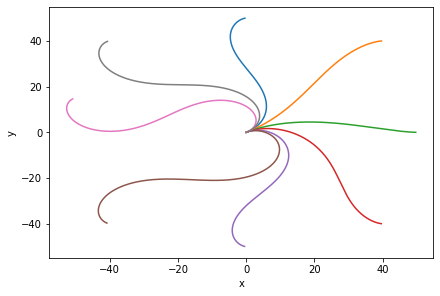

In [26]:
fig, axs = plt.subplots(1, constrained_layout=True)
axs.plot(xs1,ys1)
axs.plot(xs2,ys2)
axs.plot(xs3,ys3)
axs.plot(xs4,ys4)
axs.plot(xs5,ys5)
axs.plot(xs6,ys6)
axs.plot(xs7,ys7) 
axs.plot(xs8,ys8)
axs.set_xlabel('x')
axs.set_ylabel('y')

path 2:
مبدا متفاوت - مقصد یکسان

In [27]:
xs1,ys1 = third_function(0,0,50,0,30,2.5,10);
xs2,ys2 = third_function(40,0,40,0,30,2.5,10);
# xs3,ys3 = third_function(50,0,0,0,-30,2.5,10);
xs3,ys3 = third_function(50,0,15,0,-30,2.5,10); #تقریبی برای جلوگیری از خطا
xs4,ys4 = third_function(40,0,-40,0,30,2.5,10);
xs5,ys5 = third_function(0,0,-50,0,30,2.5,10);
xs6,ys6 = third_function(-40,0,-40,0,30,2.5,10);
xs7,ys7 = third_function(-50,0,0,0,30,2.5,10);
xs8,ys8 = third_function(-40,0,40,0,30,2.5,10);

Text(0, 0.5, 'y')

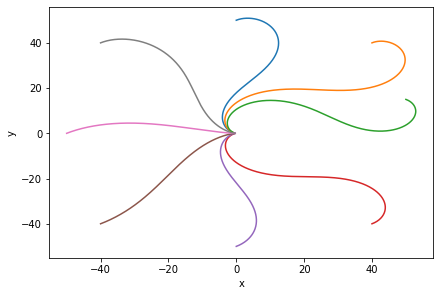

In [28]:
fig, axs = plt.subplots(1, constrained_layout=True)
axs.plot(xs1,ys1)
axs.plot(xs2,ys2)
axs.plot(xs3,ys3) 
axs.plot(xs4,ys4)
axs.plot(xs5,ys5)
axs.plot(xs6,ys6)
axs.plot(xs7,ys7)
axs.plot(xs8,ys8)
axs.set_xlabel('x')
axs.set_ylabel('y')